In [34]:
import joblib as jb
Feature_selection =jb.load('train/model/featureselected.pkl')
model=jb.load('train/model/lor.pkl')

import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


In [35]:
def flow (X_path,y_path):
    #read
    X_test=pd.read_csv(X_path)
    y_test=pd.read_csv(y_path)
    
    # Feature_selection
    feature_selected = X_test[Feature_selection]

    # predcit
    y_pred=pd.DataFrame(model.predict(feature_selected))  
        
    #metrics
    report=classification_report(y_pred,y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,disp

In [36]:
y_pred,report,disp = flow('test/xtest.csv','test/ytest.csv')

In [37]:
y_pred

,0
0,1
1,0
2,1
3,0
4,1
...,...
978,1
979,1
980,0
981,1


In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       542
           1       0.45      0.39      0.42       441

    accuracy                           0.51       983
   macro avg       0.50      0.50      0.50       983
weighted avg       0.51      0.51      0.51       983



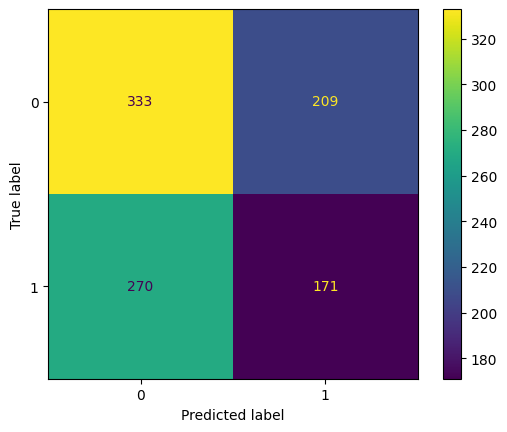

In [40]:
disp.plot()